In [1]:
#Python Warning off
import warnings
warnings.filterwarnings('ignore')

# #TF warning off
# import tensorflow as tf
# tf.compat.v2.logging.set_verbosity(tf.compat.v2.logging.ERROR)

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [65]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [66]:
from sklearn.preprocessing import MinMaxScaler  # 0.0 ~ 1.0 사이로 스케일링
from sklearn.preprocessing import LabelEncoder  # String ==> int
from sklearn.model_selection import train_test_split

In [67]:
import mglearn

In [68]:
import tensorflow as tf

In [69]:
from tensorflow import keras

In [71]:
df_raw = pd.read_csv("datasets/hotel_bookings.csv")
df_raw

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [72]:
# df_raw.info()

In [73]:
# df_raw = df_raw.apply(pd.to_numeric, errors='coerce')

In [74]:
# # 컬럼 바꿀땐 여기서 (1번)
# cols = ['hotel', 'lead_time','arrival_date_month','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr']
# # object 형변환
# df['arrival_date_month'] = LabelEncoder().fit_transform(df['arrival_date_month']) # {July => 5 }
# df

In [75]:
# # 컬럼 바꿀땐 여기서 (2번)
# cols = ['hotel', 'lead_time','is_repeated_guest','booking_changes','required_car_parking_spaces','total_of_special_requests']

In [76]:
# # 컬럼 바꿀땐 여기서 (3번) (1+2번)
# cols = ['hotel', 'lead_time','is_repeated_guest','booking_changes','required_car_parking_spaces','total_of_special_requests','arrival_date_month','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr']
# # object 형변환
# df['arrival_date_month'] = LabelEncoder().fit_transform(df_raw['arrival_date_month']) # {July => 5 }
# df

In [77]:
df=df_raw

In [78]:
df_raw_obj = df_raw.select_dtypes(include=['object']) 
list(df_raw_obj.columns)

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [79]:
# # 컬럼 바꿀땐 여기서 (4번) 그냥 전부 쓰기
# le=LabelEncoder()
# # object 항목들 숫자로 변환하기  (내 방법)
# for col in list(df_raw_obj.columns):
#     df[f'{col}']=LabelEncoder().fit_transform(df_raw[f'{col}'])
# df

In [80]:
#object 항목들 숫자로 변환하기 (방법 2)
obj_cols=[x for x in df_raw.columns if df_raw[x].dtype=="object"]

le=LabelEncoder()

for col in obj_cols:
    if col in df_raw.columns:
        i = df_raw.columns.get_loc(col)
        df_raw.iloc[:,i] = df_raw.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [90]:
df=df_raw

In [91]:
df_raw.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,2016.156554,5.490544,27.165173,15.798241,0.927599,2.500302,1.856403,...,0.221124,0.124893,86.693382,2.321149,2.137323,101.831122,0.062518,0.571363,0.649803,516.750147
std,0.472181,0.482918,106.863097,0.707476,3.535075,13.605138,8.780829,0.998613,1.908286,0.579261,...,0.652306,0.334678,110.774548,17.594721,0.577040,50.535790,0.245291,0.792798,0.497776,227.476419
min,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,9.000000,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000,336.000000
50%,0.000000,0.000000,69.000000,2016.000000,6.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,14.000000,0.000000,2.000000,94.575000,0.000000,0.000000,1.000000,524.000000
75%,1.000000,1.000000,160.000000,2017.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,229.000000,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000,709.000000
max,1.000000,1.000000,737.000000,2017.000000,11.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,21.000000,2.000000,535.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000,925.000000


In [92]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [96]:
# NaN 항 처리하기 
df['children'].fillna(0, inplace=True)
df['agent'].fillna(86, inplace=True)
# df.drop(['company'], axis=1, inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,86.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,86.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,86.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,123


In [97]:
y = df_raw['is_canceled']

In [98]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,86.0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,86.0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,86.0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,123


In [99]:
X_train, X_test, y_train,y_test = train_test_split(df, y, random_state=42)

In [100]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[0.        , 0.        , 0.28222524, ..., 0.        , 0.5       ,
        0.97513514],
       [0.        , 1.        , 0.14925373, ..., 0.        , 0.        ,
        0.73081081],
       [0.        , 1.        , 0.44776119, ..., 0.        , 0.        ,
        0.25189189],
       ...,
       [0.        , 0.        , 0.10040706, ..., 0.        , 0.5       ,
        0.72324324],
       [1.        , 1.        , 0.17639077, ..., 0.4       , 0.        ,
        0.08972973],
       [1.        , 0.        , 0.02170963, ..., 0.2       , 0.5       ,
        0.16540541]])

In [101]:
# 데이터 너무 커서 자르겠음 
cut = 4000
X_train_scaled= X_train_scaled[-cut:]
y_train = y_train[-cut:]
X_test_scaled= X_test_scaled[-cut//2:]
y_test= y_test[-cut//2:]

In [102]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((4000, 31), (4000,), (2000, 31), (2000,))

In [103]:
svm = SVC()

In [104]:
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
X_test_scaled.shape, y_test.shape

((2000, 31), (2000,))

In [111]:
print("test acc : {:.3f}".format(svm.score(X_train_scaled,y_train)))
#test acc : 0

test acc : 1.000


In [107]:
print("test acc : {:.3f}".format(svm.score(X_test_scaled,y_test)))
#test acc : 0

test acc : 1.000


In [108]:
# GridSearch Cross Validation 

In [109]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(SVC(), param_grid,cv=5)
grid.fit(X_train_scaled, y_train)

print("best parameter :", grid.best_params_)
print("cross val acc: {:.2f}".format(grid.best_score_))
print("test acc : {:.2f}".format(grid.score(X_test_scaled, y_test)))

best parameter : {'C': 0.01, 'gamma': 0.1}
cross val acc: 1.00
test acc : 1.00


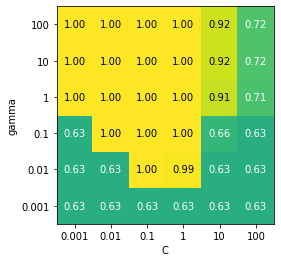

In [110]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(6,-1), 
                      xlabel="C", ylabel="gamma", 
                        xticklabels=param_grid['C'], yticklabels=param_grid['gamma'], vmin=0)

In [ ]:
# {'C': 0.01, 'gamma': 0.1}
svm = SVC(C=0.01, gamma=0.1)